In [1]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
import pandas as pd
df=pd.read_csv('data_2_var.csv')
df.head()

,-122.7406674,-130.5720846,y
0,-121.531419,-129.938929,1
1,-134.917019,-130.141832,1
2,-120.605951,-125.760932,1
3,-129.894781,-112.785214,1
4,-134.366669,-116.000000,1



Bad key text.latex.preview in file C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\ACER\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

<AxesSubplot:>

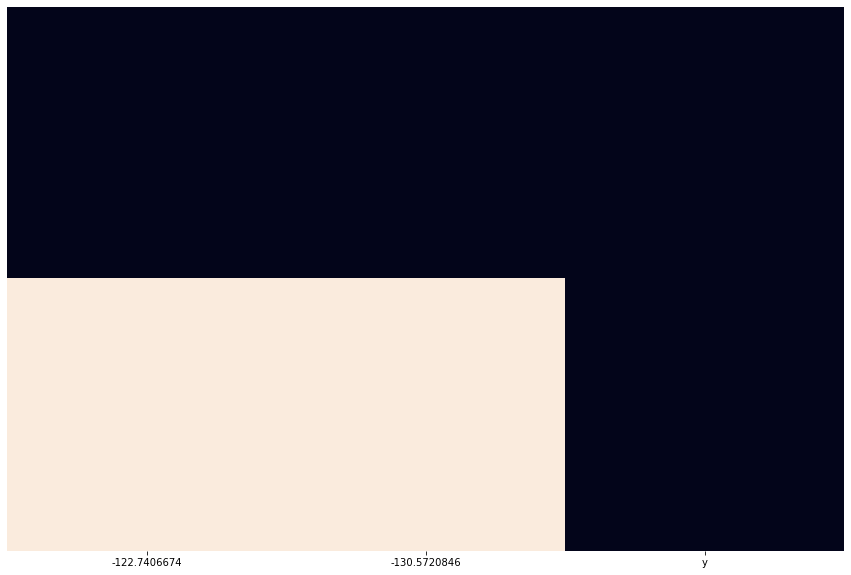

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [4]:
# sum of null values in all the features
df.isnull().sum()

-122.7406674    1117
-130.5720846    1117
y                  0
dtype: int64

In [5]:
# percentage of null values
df.isnull().mean()

-122.7406674    0.501572
-130.5720846    0.501572
y               0.000000
dtype: float64

In [6]:
#As there are very less amount of Null value present over there hence we can drop that rows
df.dropna(inplace=True)

In [7]:
#checking if there is any null value present or not
df.isnull().sum()

-122.7406674    0
-130.5720846    0
y               0
dtype: int64

In [8]:
df

,-122.7406674,-130.5720846,y
0,-121.531419,-129.938929,1
1,-134.917019,-130.141832,1
2,-120.605951,-125.760932,1
3,-129.894781,-112.785214,1
4,-134.366669,-116.000000,1
...,...,...,...
1105,-115.366669,121.000000,0
1106,-119.954237,123.609122,0
1107,-109.942155,127.197394,0
1108,-111.515368,128.170885,0


In [9]:
df.head()

,-122.7406674,-130.5720846,y
0,-121.531419,-129.938929,1
1,-134.917019,-130.141832,1
2,-120.605951,-125.760932,1
3,-129.894781,-112.785214,1
4,-134.366669,-116.000000,1


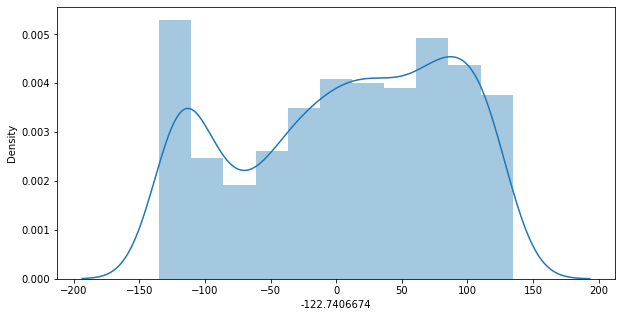

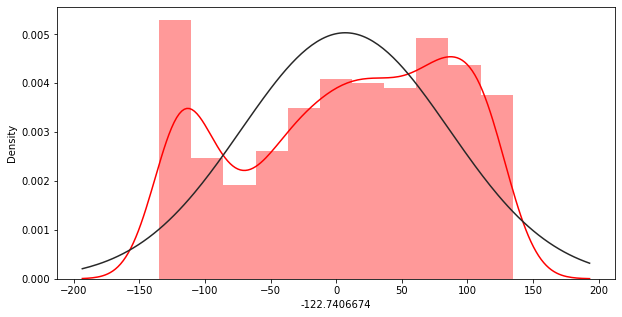

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['-122.7406674'])
plt.show()

plt.figure(figsize=(10,5))
from scipy.stats import norm
sns.distplot(df['-122.7406674'], fit=norm , color='r')
plt.show()

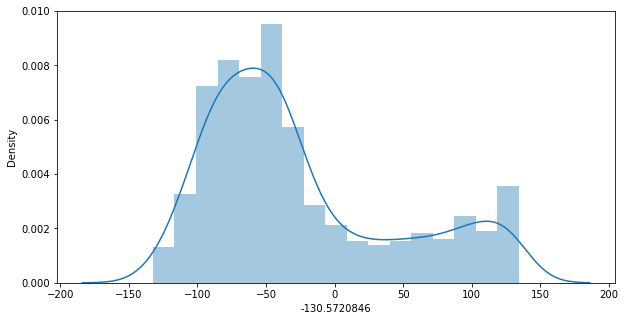

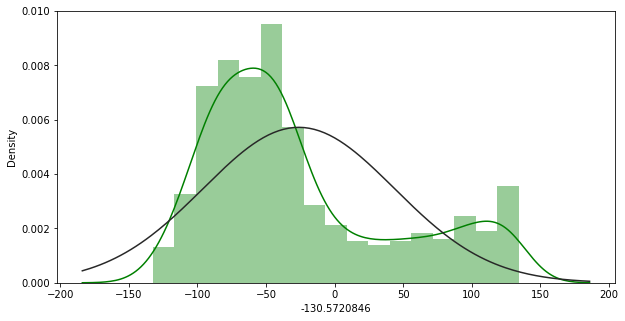

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['-130.5720846'])
plt.show()

plt.figure(figsize=(10,5))
from scipy.stats import norm
sns.distplot(df['-130.5720846'], fit=norm , color='g')
plt.show()

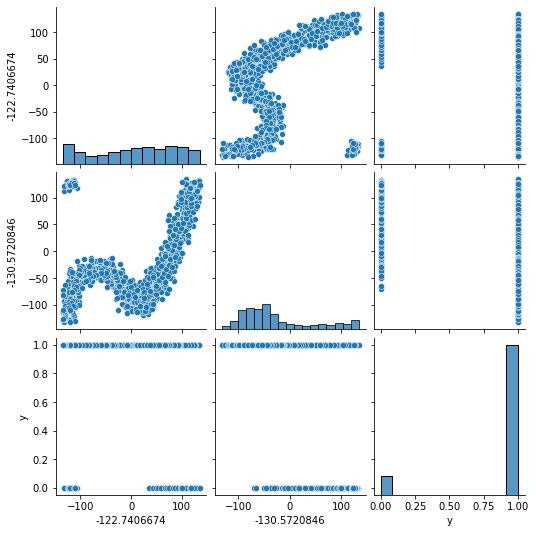

In [12]:
sns.pairplot(data=df)

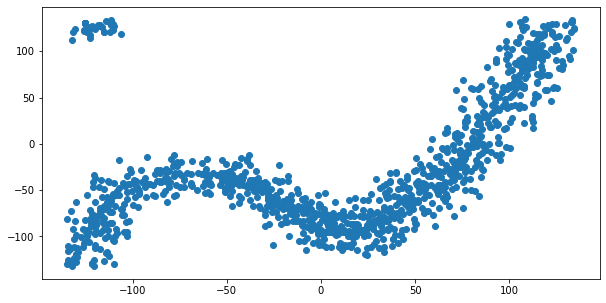

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df['-122.7406674'], df['-130.5720846'])

<AxesSubplot:xlabel='y', ylabel='count'>

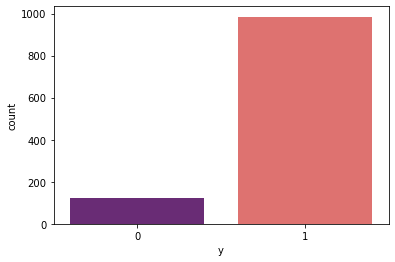

In [14]:
sns.countplot(df['y'],palette="magma")

<AxesSubplot:>

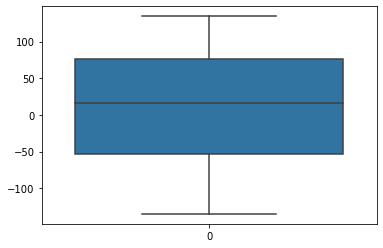

In [15]:
sns.boxplot(data=df['-122.7406674'])

<AxesSubplot:>

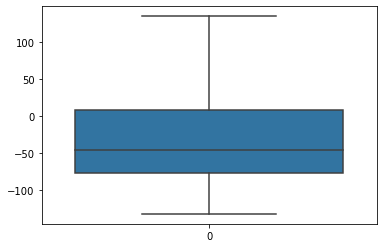

In [16]:
sns.boxplot(data=df['-130.5720846'])

In [17]:
#some stataical information of the data
df.describe()

,-122.7406674,-130.5720846,y
count,1110.000000,1110.000000,1110.000000
mean,6.899714,-26.093318,0.887387
std,79.324069,69.755980,0.316261
min,-134.962839,-132.422167,0.000000
25%,-53.366669,-76.994298,1.000000
50%,15.739103,-46.036319,1.000000
75%,76.193907,7.598960,1.000000
max,134.605775,134.425495,1.000000


In [18]:
print('The maximum value of -122.7406674 features', df['-122.7406674'].max())
print('The maximum value of -130.5720846 features', df['-130.5720846'].max())
print('The minimum value of -122.7406674 features', df['-122.7406674'].min())
print('The minimum value of -130.5720846 features', df['-130.5720846'].min())

The maximum value of -122.7406674 features 134.6057752
The maximum value of -130.5720846 features 134.4254952
The minimum value of -122.7406674 features -134.9628386
The minimum value of -130.5720846 features -132.422167


In [19]:
df.shape

(1110, 3)

In [20]:
df1=df.copy()

In [21]:
Q1_value = df1.quantile(0.25) #25%
Q3_value = df1.quantile(0.75) #75%
IQR_value = Q3_value- Q1_value
print(IQR_value)

-122.7406674    129.560576
-130.5720846     84.593257
y                 0.000000
dtype: float64


In [22]:
print('The unique element present in y feature',df['y'].unique())
print('The number of records present in the dataframe', df1.shape[0])

The unique element present in y feature [1 0]
The number of records present in the dataframe 1110


In [23]:
print((df1 < (Q1_value - 1.5 * IQR_value)) |(df1 > (Q3_value + 1.5 * IQR_value))) #checking the outlier

      -122.7406674  -130.5720846      y
0            False         False  False
1            False         False  False
2            False         False  False
3            False         False  False
4            False         False  False
...            ...           ...    ...
1105         False         False   True
1106         False         False   True
1107         False         False   True
1108         False         False   True
1109         False         False   True

[1110 rows x 3 columns]


In [24]:
#removing the outlier from the data
df1_remove_outlier = df1[~((df1 < (Q1_value - 1.5 * IQR_value)) |(df1 > (Q3_value + 1.5 * IQR_value))).any(axis=1)]
df1_remove_outlier.shape

(985, 3)

In [25]:
print('The number of records present before removing the outlier', df.shape[0])
print('The number of records present after removing the outlier', df1_remove_outlier.shape[0])

The number of records present before removing the outlier 1110
The number of records present after removing the outlier 985


In [26]:
#splitting the dependent and independent features
x=df1.drop('y', axis='columns')
Y=df1['y']

In [27]:
x.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [28]:
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [29]:
#Normalising the data
from sklearn.preprocessing import Normalizer
n=Normalizer()
X=n.fit_transform(x)

In [30]:
X[:5]

array([[-0.68308413, -0.7303397 ],
       [-0.71972893, -0.69425519],
       [-0.69215978, -0.72174431],
       [-0.75508534, -0.65562651],
       [-0.75694545, -0.65347807]])

In [31]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

In [32]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((888, 2), (222, 2), (888,), (222,))

In [33]:
print(y_train.unique())
print(y_train.value_counts())

[1 0]
1    794
0     94
Name: y, dtype: int64


In [34]:
print(y_test.unique())
print(y_test.value_counts())

[1 0]
1    191
0     31
Name: y, dtype: int64


# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
model_DT.score(X_test,y_test)

0.8603603603603603

# Decision Tree Classifier hyperparameter tunning

In [37]:
model_DT=DecisionTreeClassifier(criterion='entropy')
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
model_DT.score(X_test,y_test)

0.8513513513513513

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(knn.score(X_test,y_test))

[[ 16  15]
 [ 17 174]]
              precision    recall  f1-score   support

           0       0.48      0.52      0.50        31
           1       0.92      0.91      0.92       191

    accuracy                           0.86       222
   macro avg       0.70      0.71      0.71       222
weighted avg       0.86      0.86      0.86       222

0.8558558558558559


## When K=1 the accuracy is 89%

In [42]:
KNN_error_rate = []
import numpy as np
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    KNN_error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

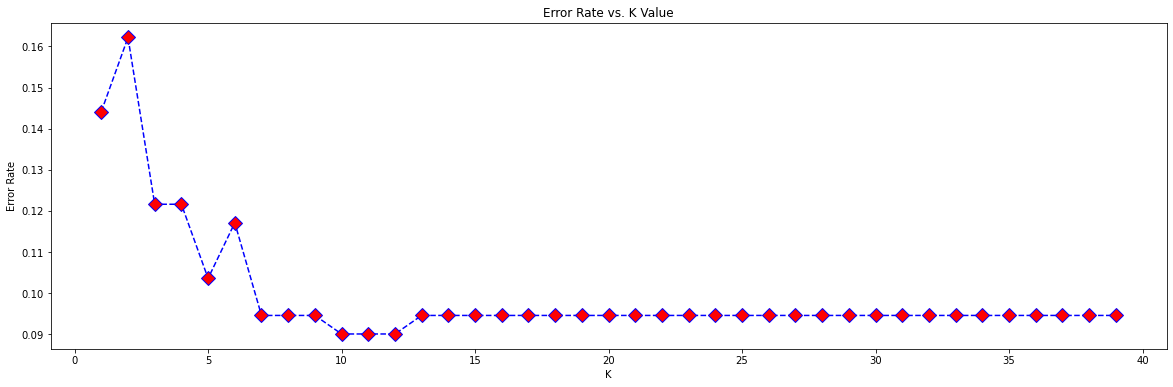

In [43]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),KNN_error_rate,color='blue', linestyle='dashed', marker='D',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(knn.score(X_test,y_test))

WITH K=6


[[ 10  21]
 [  0 191]]


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.90      1.00      0.95       191

    accuracy                           0.91       222
   macro avg       0.95      0.66      0.72       222
weighted avg       0.91      0.91      0.88       222



0.9054054054054054


### Now when K=6 the accuracy is 94% , hence the accuracy increases from the value when K=1

# SVM

In [45]:
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(X_train,y_train)

SVC()

In [46]:
model_SVC.score(X_test,y_test)

0.9054054054054054

In [47]:
pred_svc = model_SVC.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_svc))
print('\n')
print(classification_report(y_test,pred_svc))



[[ 10  21]
 [  0 191]]


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.90      1.00      0.95       191

    accuracy                           0.91       222
   macro avg       0.95      0.66      0.72       222
weighted avg       0.91      0.91      0.88       222



In [48]:
model_SVC_h=SVC(kernel='linear')
model_SVC_h.fit(X_train,y_train)

model_SVC_h.score(X_test,y_test)

0.8603603603603603

In [49]:
pred_svc_h = model_SVC_h.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_svc_h))
print('\n')
print(classification_report(y_test,pred_svc_h))



[[  0  31]
 [  0 191]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.86      1.00      0.92       191

    accuracy                           0.86       222
   macro avg       0.43      0.50      0.46       222
weighted avg       0.74      0.86      0.80       222



# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model_Lr=LogisticRegression()
model_Lr.fit(X_train,y_train)
model_Lr.score(X_test,y_test)

0.8828828828828829

In [51]:
pred_Lr = model_Lr.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred_Lr))
print('\n')
print(classification_report(y_test,pred_Lr))



[[  5  26]
 [  0 191]]


              precision    recall  f1-score   support

           0       1.00      0.16      0.28        31
           1       0.88      1.00      0.94       191

    accuracy                           0.88       222
   macro avg       0.94      0.58      0.61       222
weighted avg       0.90      0.88      0.84       222



## Applying Cross Validation and Grid Search CV

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [100,10,50,20,1,0.1,0.01]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10,12]
        }
    }
}

In [53]:
scores_value = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores_value.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1_score = pd.DataFrame(scores_value,columns=['model','best_score','best_params'])
df1_score

,model,best_score,best_params
0,svm,0.926808,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.895271,{'n_estimators': 5}
2,logistic_regression,0.923418,{'C': 100}
3,decision_tree,0.924548,"{'criterion': 'entropy', 'max_depth': 2}"


<AxesSubplot:xlabel='model', ylabel='best_score'>

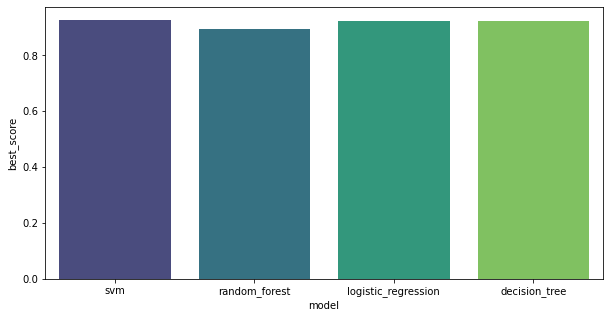

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1_score, x='model', y='best_score', palette="viridis")

## Hence from the above graph we can conclude thar Support Vector Machine Plays the best with accuracy score 0.926808 which is equals to 92%.